In [1]:
#----------------------------------------------
import torch
import swin
import upper_net_mmseg
import torch.nn as nn 
import models
from tensorflow.keras.utils import to_categorical

# model swin
model_swin = swin.swin()

# model upernet
model_upernet = upper_net_mmseg.UPerHead(
    in_channels = model_swin.out_channels[1:],
    channels = model_swin.out_channels[2],
    in_index= (0,1,2,3),
    dropout_ratio=0.1,
    norm_cfg= dict(type='SyncBN', requires_grad=True)
)


# model samrs 
samrs = models.SamRS(model1=model_swin, model2=model_upernet)

/mnt/hdd/eric/.conda/envs/8.tmp.copied/lib/python3.8/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [2]:
# load
w_path = "./swint_upernet_imp_sep_model.pth"
samrs.load_state_dict( torch.load(w_path)['state_dict'] )

<All keys matched successfully>

In [3]:
samrs

SamRS(
  (encoder): swin(
    (patch_embed): PatchEmbed(
      (proj): Conv2d(3, 96, kernel_size=(4, 4), stride=(4, 4))
      (norm): LayerNorm((96,), eps=1e-05, elementwise_affine=True)
    )
    (pos_drop): Dropout(p=0.0, inplace=False)
    (layers): ModuleList(
      (0): BasicLayer(
        (blocks): ModuleList(
          (0): SwinTransformerBlock(
            (norm1): LayerNorm((96,), eps=1e-05, elementwise_affine=True)
            (attn): WindowAttention(
              (qkv): Linear(in_features=96, out_features=288, bias=True)
              (attn_drop): Dropout(p=0.0, inplace=False)
              (proj): Linear(in_features=96, out_features=96, bias=True)
              (proj_drop): Dropout(p=0.0, inplace=False)
              (softmax): Softmax(dim=-1)
            )
            (drop_path): Identity()
            (norm2): LayerNorm((96,), eps=1e-05, elementwise_affine=True)
            (mlp): Mlp(
              (fc1): Linear(in_features=96, out_features=384, bias=True)
            

In [12]:
# # data 896 or 512 

#     if args.dataset == 'potsdam':
#         IMAGE_SIZE = 512
#         root = '/dataset/potsdam_rgb_dataset'
#     elif args.dataset == 'vaihingen':
#         IMAGE_SIZE = 512
#         root = ''
#     elif args.dataset == 'isaid':
#         IMAGE_SIZE = 896

In [13]:
# train_trfm = A.Compose([
#     #A.RandomResizedCrop(height=IMAGE_SIZE, width=IMAGE_SIZE, scale=(0.5, 2.0), p=1),
#     A.RandomScale(scale_limit=(-0.5, 1.0), p=0.5),
#     A.PadIfNeeded(min_height=IMAGE_SIZE, min_width=IMAGE_SIZE, border_mode=cv2.BORDER_CONSTANT, value=0, mask_value=args.ignore_label, p=1.0),
#     A.RandomCrop(height=IMAGE_SIZE, width=IMAGE_SIZE, p=1.0),
#     #A.RandomCrop(NEW_SIZE*3, NEW_SIZE*3),
#     #A.Resize(IMAGE_SIZE, IMAGE_SIZE),
#     A.HorizontalFlip(p=0.5),
#     A.VerticalFlip(p=0.5),
#     A.RandomRotate90()
# #    A.OneOf([
# #        A.RandomContrast(),
# #        A.RandomGamma(),
# #        A.RandomBrightness(),
# #        A.ColorJitter(brightness=0.07, contrast=0.07,
# #                   saturation=0.1, hue=0.1, always_apply=False, p=0.3),
# #        ], p=0.3),
# ])
# val_trfm = A.Compose([
#     #A.CenterCrop(IMAGE_SIZE, IMAGE_SIZE),
#     A.Resize(IMAGE_SIZE, IMAGE_SIZE),
#     # A.HorizontalFlip(p=0.5),
#     # A.VerticalFlip(p=0.5),
#     # A.RandomRotate90()
# ])

In [93]:
sample_f = "/mnt/hdd/eric/.tmp_ipy/15.Lab_Detection/00.Data/isaid/TrainData/train/Instance_masks/images/images/P0012_instance_id_RGB.png"
sample_f = "/mnt/hdd/eric/.tmp_ipy/15.Lab_Detection/00.Data/isaid/TrainData/train/Semantic_masks/images/images/P0012_instance_color_RGB.png"

In [106]:
from PIL import Image
import numpy as np
import cv2
label_rgb = Image.open(sample_f)
label = cv2.imread(sample_f, cv2.IMREAD_GRAYSCALE)

In [107]:
label = np.asarray(label)
label_rgb = np.asarray(label_rgb)

In [108]:
label.shape

(1990, 2896)

In [109]:
np.unique(label)

array([ 0, 14, 89], dtype=uint8)

In [111]:
np.unique(label_rgb)

array([  0, 127], dtype=uint8)

In [114]:
rr = (0 + 127 + 0)/3

In [115]:
rr

42.333333333333336

In [9]:
z = label[:512,:512,:]

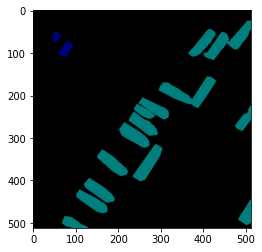

In [10]:
import matplotlib.pyplot as plt 
plt.imshow(z)

In [11]:

ISAID_CLASSES = ('background', 'ship', 'store_tank', 'baseball_diamond',
               'tennis_court', 'basketball_court', 'Ground_Track_Field',
               'Bridge', 'Large_Vehicle', 'Small_Vehicle', 'Helicopter',
               'Swimming_pool', 'Roundabout', 'Soccer_ball_field', 'plane',
               'Harbor')

ISAID_PALETTE = {
    0: (0, 0, 0), 1: (0, 0, 63), 2: (0, 63, 63), 3: (0, 63, 0), 4: (0, 63, 127),
    5: (0, 63, 191), 6: (0, 63, 255), 7: (0, 127, 63), 8: (0, 127, 127),
    9: (0, 0, 127), 10: (0, 0, 191), 11: (0, 0, 255), 12: (0, 191, 127),
    13: (0, 127, 191), 14: (0, 127, 255), 15: (0, 100, 155)}

In [17]:
ISAID_CLASSES[8]

'Large_Vehicle'

In [18]:
len(ISAID_CLASSES)

16

In [32]:
torch.zeros( z.shape[0], z.shape[1], z.shape[2] ).shape

torch.Size([512, 512, 3])

In [80]:
np.unique(z)

array([  0, 127], dtype=uint8)

In [81]:
z_c = z.copy()

In [82]:

ISAID_PALETTE = {
    0: (0, 0, 0), 1: (0, 0, 63), 2: (0, 63, 63), 3: (0, 63, 0), 4: (0, 63, 127),
    5: (0, 63, 191), 6: (0, 63, 255), 7: (0, 127, 63), 8: (0, 127, 127),
    9: (0, 0, 127), 10: (0, 0, 191), 11: (0, 0, 255), 12: (0, 191, 127),
    13: (0, 127, 191), 14: (0, 127, 255), 15: (0, 100, 155)}


def rgb_to_2D_label(label):
    label_seg = np.zeros(label.shape, dtype=np.uint8)
    label_seg [np.all(label == ISAID_PALETTE[], axis = -1)] = 0
    label_seg [np.all(label == Land, axis = -1)] = 1
    label_seg [np.all(label == Road, axis = -1)] = 2  
    label_seg [np.all(label == Vegetation, axis = -1)] = 3   
    label_seg [np.all(label == Water, axis = -1)] = 4
    label_seg [np.all(label == Building, axis = -1)] = 5
    
    label_seg = label_seg[:,:,0]
    
    return label_seg

{0: (0, 0, 0),
 1: (0, 0, 63),
 2: (0, 63, 63),
 3: (0, 63, 0),
 4: (0, 63, 127),
 5: (0, 63, 191),
 6: (0, 63, 255),
 7: (0, 127, 63),
 8: (0, 127, 127),
 9: (0, 0, 127),
 10: (0, 0, 191),
 11: (0, 0, 255),
 12: (0, 191, 127),
 13: (0, 127, 191),
 14: (0, 127, 255),
 15: (0, 100, 155)}

In [33]:
z_c = z.copy()

for k,v in ISAID_PALETTE.items():
    indices = np.where(np.all(z == v, axis=-1))
    z_c[indices] = k

z_c_0 = z_c[:,:,0].copy()

In [34]:
np.unique(z_c)

array([0, 8, 9], dtype=uint8)

In [35]:
np.unique(z_c_0)

array([0, 8, 9], dtype=uint8)

In [36]:
z_c.shape

(512, 512, 3)

In [25]:
# label = cv2.imread(label_path, cv2.IMREAD_GRAYSCALE)  # GRAY 1 channel ndarray with shape H * W

# label = np.array(label, dtype=np.int32)
# label = self._class_to_trainid(label)
# 아,, one-hot encoding 필수. channel-wise 하게 연산하고, categorical 

In [39]:
zero_label = z_c[:,:,0].copy()

In [47]:
zero_label.shape

(512, 512)

In [46]:
from tensorflow.keras.utils import to_categorical

In [53]:
label_oh = to_categorical(zero_label,num_classes=len(ISAID_PALETTE.keys()))

In [54]:
label_oh.shape

(512, 512, 16)

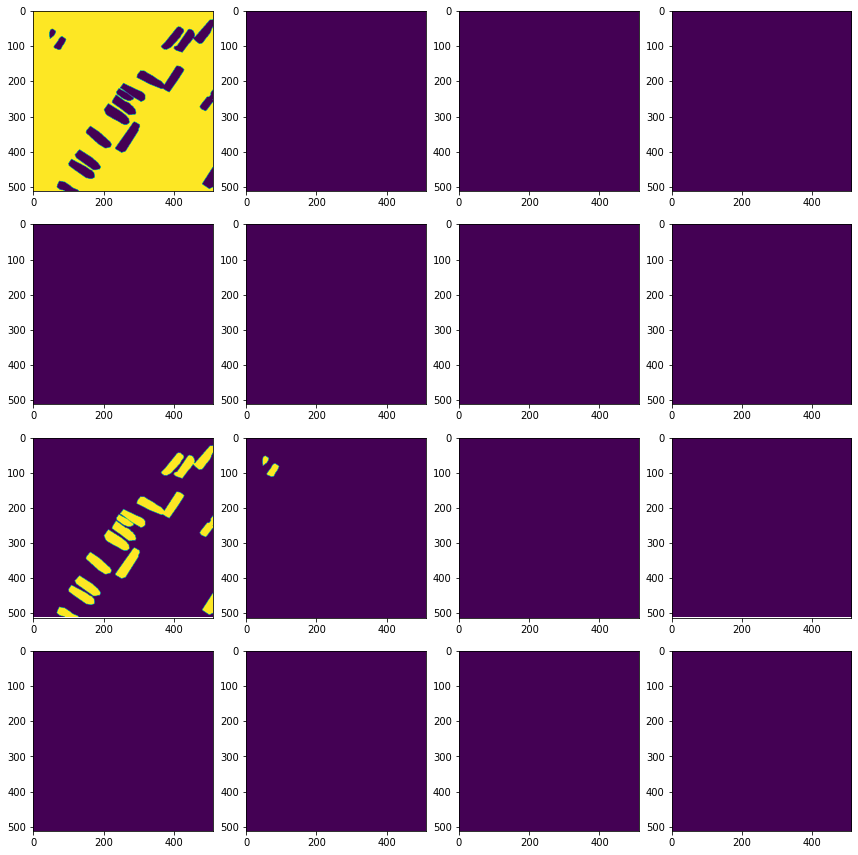

In [58]:
# visualizae ! 

rows_cols = label_oh.shape[-1]

fig,axs = plt.subplots(nrows=4, ncols=4, figsize=(12,12))

cnt = 0
for row in range(4):
    for col in range(4):
        
        axs[row,col].imshow(label_oh[:,:,cnt] )
        cnt += 1

# Adjust layout to prevent overlap of subplots
plt.tight_layout()

# Show the plots
plt.show()

In [91]:
%load_ext autoreload
%autoreload 2
import custom_dataset
import utils_rs

img_path = "/mnt/hdd/eric/.tmp_ipy/00.Data/DOTA_dataset/dota1_origin/train/images"
mask_path = "/mnt/hdd/eric/.tmp_ipy/15.Lab_Detection/00.Data/isaid/TrainData/train/Semantic_masks/images/images"
segdataset = custom_dataset.SegDataset(img_path, mask_path, 512,augmentations=None)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [92]:
encoded_masks = segdataset.__preprocess_masks__()

---mask encoding:   2%|▏         | 29/1411 [00:46<36:58,  1.61s/it]  


KeyboardInterrupt: 

In [74]:
img,label = segdataset.__getitem__(0)

In [75]:
label.shape

(2563, 2579, 16)

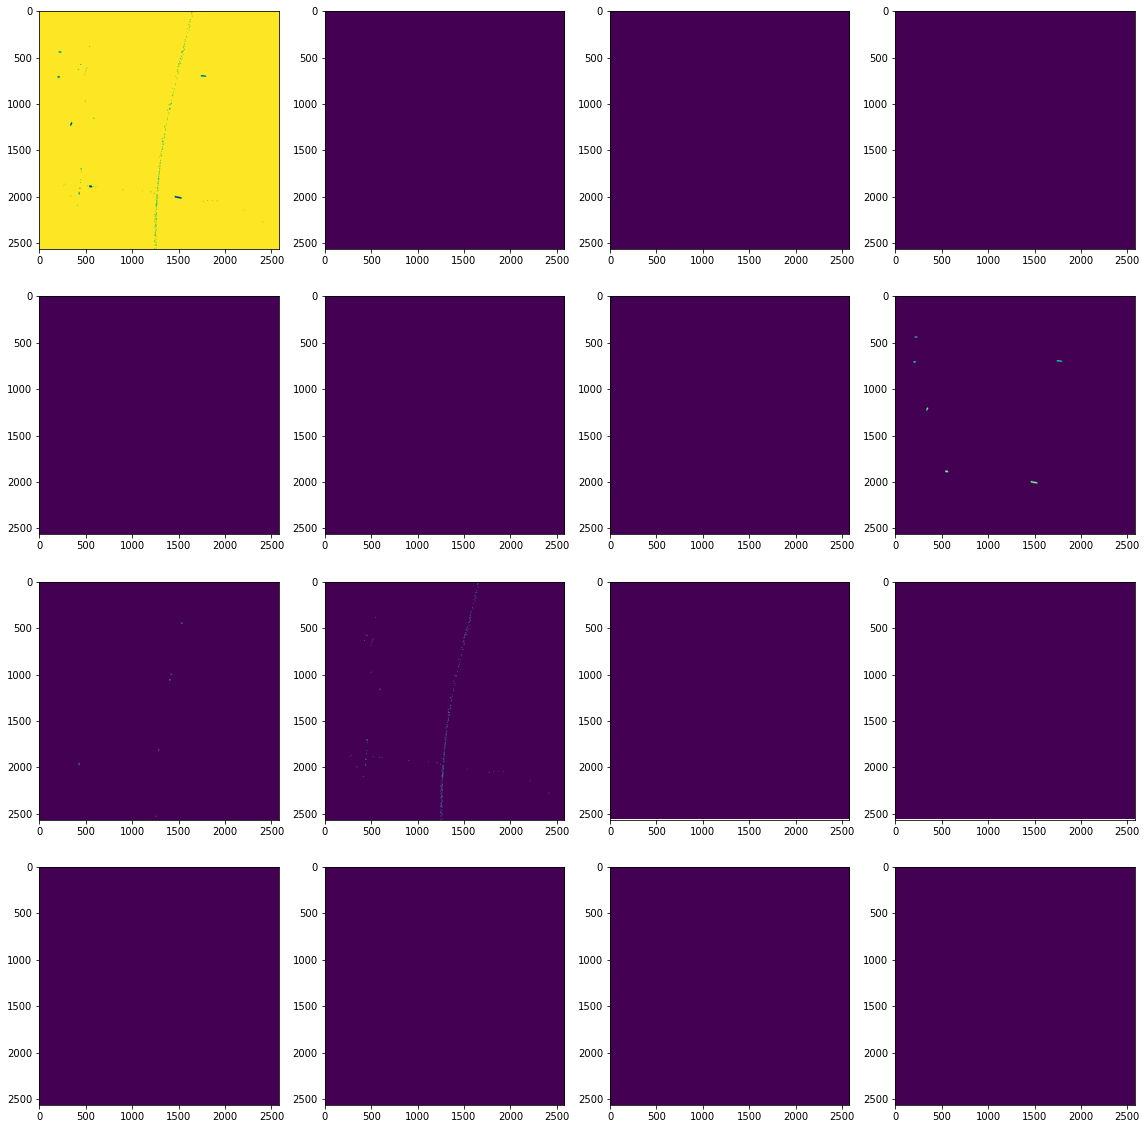

In [76]:
utils_rs.mask_display(label=label, nrows=4, ncols=4)

In [215]:
z.shape # 이거 모델에 넣을때는 어떻게했나? ? ? 아어,  segmentation 기본 테크닉들 다까먹었네 ㅋ 
# 아 그럼, 일단 대충 넘어가고, 

(512, 512, 3)

In [271]:
import cv2
label = cv2.imread(sample_f, cv2.IMREAD_GRAYSCALE) # IMREAD_GRAYSCALE # IMREAD_COLOR

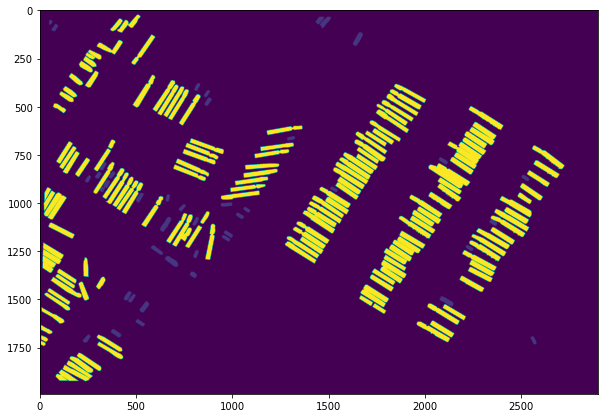

In [274]:
plt.figure(figsize=(10,10))
plt.imshow(label)

In [441]:
np.unique(label)

array([0, 1])

In [442]:
z_c_0.shape

(512, 512)

In [438]:
target_one_hot = torch.zeros(z_c_0.shape[0],z_c_0.shape[0])
target_one_hot.shape

torch.Size([512, 512])

In [439]:
import torch.nn.functional as F
label_ = torch.from_numpy(z_c_0)
label_oh = F.one_hot(label_.long(), num_classes=16)

In [440]:
label_oh.shape

torch.Size([512, 512, 16])

In [296]:
label_oh.shape

torch.Size([512, 512, 16])

In [297]:
z_c_0.shape

(512, 512)

In [298]:
#----------------------------

from glob import glob
import os
root_dir = "/mnt/hdd/eric/.tmp_ipy/15.Lab_Detection/00.Data/isaid/TrainData/train/Semantic_masks/images/images"
imgs = glob(os.path.join(root_dir,"*.png"))

In [299]:
len(imgs)

1411

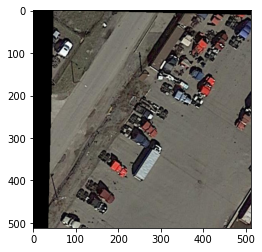

In [220]:
dota_s = Image.open("/mnt/hdd/eric/.tmp_ipy/00.Data/DOTA_dataset/dota1_origin/train/images/P0012.png")
aa = np.asarray(dota_s)
sd = aa[:512,:512,:]
plt.imshow(sd)

In [221]:
# class 18 , first output 

sample_torch = torch.from_numpy(sd).float()
print(sample_torch.shape)
sample_torch = sample_torch.permute(2,1,0)
sample_torch = sample_torch.unsqueeze(0)
sample_torch = sample_torch.to("cuda:0")

torch.Size([512, 512, 3])


In [222]:
_ = samrs.to("cuda:0")

In [61]:
samrs = samrs.eval()

In [63]:
result = samrs(sample_torch)

In [71]:
result[0].shape

torch.Size([1, 18, 512, 512])

torch.Size([512, 512, 18])


TypeError: Invalid shape (512, 512, 18) for image data

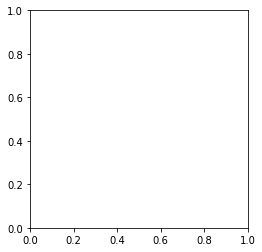

In [105]:
label_approx = 2

b_s = result[0].squeeze(0).permute(1,2,0)
print(b_s.shape)
softmax_ = nn.Softmax(dim=-1)
a_s = softmax_(b_s)
a_s = a_s.detach().cpu().numpy()
#for_png = result[0].squeeze(0).permute(1,2,0)[:,:,label_approx].detach().cpu().numpy()

plt.imshow(a_s)